In [80]:
import cv2   
import numpy as np   
import matplotlib.pyplot as plt
import imutils
from scipy.spatial import ConvexHull

In [81]:
coordinates = []
def click_event(event, x, y, flags, params):
  
    # checking for left mouse clicks
    if event == cv2.EVENT_LBUTTONDOWN:
  
        # displaying the coordinates
        # on the Shell
        print(x, ' ', y)
  
        # displaying the coordinates
        # on the image window
#         font = cv2.FONT_HERSHEY_SIMPLEX
#         cv2.putText(img, str(x) + ',' +
#                     str(y), (x,y), font,
#                     1, (255, 0, 0), 2)
        cv2.imshow('image', img)
        coordinates.append([x,y])
  
    # checking for right mouse clicks     
    if event==cv2.EVENT_RBUTTONDOWN:
  
        # displaying the coordinates
        # on the Shell
        print(x, ' ', y)
  
        # displaying the coordinates
        # on the image window
#         font = cv2.FONT_HERSHEY_SIMPLEX
#         b = img[y, x, 0]
#         g = img[y, x, 1]
#         r = img[y, x, 2]
#         cv2.putText(img, str(b) + ',' +
#                     str(g) + ',' + str(r),
#                     (x,y), font, 1,
#                     (255, 255, 0), 2)
        cv2.imshow('image', img)
        coordinates.append([x,y])

In [82]:
fileName = 'vis_Bakul_002_000970.png'
imgDirPath = 'F:\\IIIT-H Work\\win_det_heatmaps\\rrcServerData\\templateMatching\\images\\resnet\\'
imgPath = imgDirPath + fileName
# Reading the main image   
img = cv2.imread(imgPath,1)
img_show = np.copy(img)
img_rgb = np.copy(img)

In [ ]:
plt.figure()
plt.imshow(img_rgb)
cv2.imshow('image', img_rgb)

# setting mouse hadler for the image
# and calling the click_event() function
cv2.setMouseCallback('image', click_event)

# wait for a key to be pressed to exit
cv2.waitKey(0)

# close the window
cv2.destroyAllWindows()

334   395
340   507
495   507
494   394


In [31]:
print(coordinates)

[[337, 104], [342, 247], [501, 252], [504, 108]]


In [75]:
# Loop through list to find range of x and y

def calculateRange(coordinates, padding, imageShape):
    minX = maxX = coordinates[0][0]
    minY = maxY = coordinates[0][1]
    startX = startY = endX = endY = 0
    h,w,c = imageShape
    for i in range(len(coordinates)):
        if minX > coordinates[i][0]:
            minX = coordinates[i][0]
        if maxX < coordinates[i][0]:
            maxX = coordinates[i][0]

        if minY > coordinates[i][1]:
            minY = coordinates[i][1]
        if maxY < coordinates[i][1]:
            maxY = coordinates[i][1]
    
    if (minX - padding < 0):
        startX = 0
    else:
        startX = minX - padding
    if (minY - padding < 0):
        startY = 0
    else:
        startY = minY - padding
    if (maxX + padding >= w):
        endX = w - 1
    else:
        endX = maxX + padding
    if (maxY + padding >= h):
        endY = h - 1
    else:
        endY = maxY + padding
    return startX, endX, startY, endY

325 506 384 517


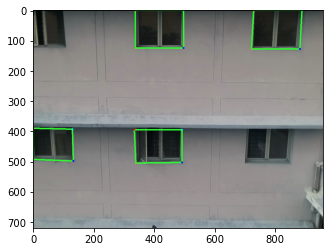

In [76]:
padding = 10
startX, endX, startY, endY = calculateRange(coordinates, padding, img_rgb.shape)
plt.imshow(img_rgb)
print(startX, endX, startY, endY)

In [9]:
img_rgb.shape

(720, 960, 3)

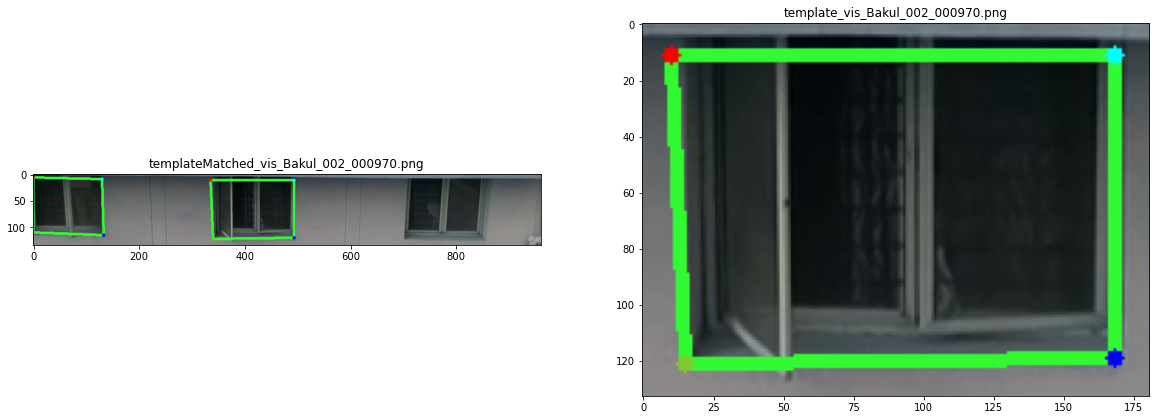

In [77]:
template = img_rgb[startY:endY, startX:endX, :]
plt.figure(figsize=(20,10))
plt.subplot(1, 2, 2)
plt.imshow(template)
plt.title('template_' + str(fileName)) 
searchImg = img_rgb[startY:endY, : ,:]
plt.subplot(1, 2, 1)
plt.imshow(searchImg)
plt.title('templateMatched_' + str(fileName)) 
plt.show()

(array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
      dtype=int64), array([317, 318, 319, 320, 321, 322, 323, 324, 325, 326, 327, 328, 329,
       330, 331, 332, 333, 679, 680, 681], dtype=int64))
x: 317 y: 0
x: 318 y: 0
x: 319 y: 0
x: 320 y: 0
x: 321 y: 0
x: 322 y: 0
x: 323 y: 0
x: 324 y: 0
x: 325 y: 0
x: 326 y: 0
x: 327 y: 0
x: 328 y: 0
x: 329 y: 0
x: 330 y: 0
x: 331 y: 0
x: 332 y: 0
x: 333 y: 0
x: 679 y: 0
x: 680 y: 0
x: 681 y: 0
(array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0], dtype=int64), array([288, 289, 290, 298, 299, 300, 301, 302, 303, 304, 305, 306, 307,
       308, 309, 310, 311, 312, 313, 314, 315, 316, 317, 318, 319, 320,
       321, 322, 323, 324, 325, 326, 327, 328, 329, 330, 331, 332, 333,
       334, 335, 336, 337, 338, 339, 340, 341, 342, 343, 344, 3

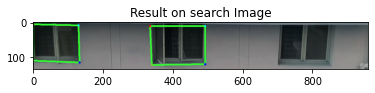

In [78]:
def mapCoordsToOriginalFrame(coords, searchImgCoords):
    mappedCoords = []
    startX, endX, startY, endY = searchImgCoords
    
    for i in range(len(coords)):
        mappedCoords.append((coords[i][0], coords[i][1] + startY, coords[i][2], coords[i][3] + startY))
    return mappedCoords

img_gray = cv2.cvtColor(img_rgb, cv2.COLOR_BGR2GRAY)   
searchImg_gray = cv2.cvtColor(searchImg, cv2.COLOR_BGR2GRAY)
rects = []

for i in [-2.5, 0, 2.5]:
        # Apply rotation and shear to template
    rotatedTemplate = imutils.rotate(template, i)
    plt.imshow(rotatedTemplate)
    plt.title('rotatedTemplate_' + str(fileName)) 

    template_gray = cv2.cvtColor(rotatedTemplate, cv2.COLOR_BGR2GRAY)   

    # Store width in variable w and height in variable h of template  
    tW, tH = template_gray.shape[::-1]   
    # Now we perform match operations.   
    res = cv2.matchTemplate(searchImg_gray,template_gray,cv2.TM_CCOEFF_NORMED)   
    # Declare a threshold   
    threshold = 0.550
    # Store the coordinates of matched region in a numpy array   
    loc = np.where( res >= threshold)
    print(loc)
    # Draw a rectangle around the matched region.   
    for pt in zip(*loc[::-1]): 
        print('x: ' + str(pt[0]) + ' y: ' + str(pt[1]))
#         cv2.rectangle(searchImg, pt, (pt[0] + tW, pt[1] + tH), (255,0,0), 1)   
        rects.append((pt[0], pt[1], pt[0] + tW, pt[1] + tH))
    # Now display the final matched template image   
    plt.imshow(searchImg)  
    plt.title('Result on search Image')
    #cv2.imwrite('Template_' +  '0.6_threshold_' + fileName, template)
    #cv2.imwrite('TemplateMatched_'  + '0.6_threshold_' + fileName, searchImg)


######
#NMS
######

In [57]:
print(rects)
for i in range(len(rects)):
    print(rects[i][0])

[(321, 0, 501, 133), (322, 0, 502, 133), (323, 0, 503, 133), (324, 0, 504, 133), (325, 0, 505, 133), (326, 0, 506, 133), (327, 0, 507, 133), (328, 0, 508, 133), (329, 0, 509, 133), (318, 0, 498, 133), (319, 0, 499, 133), (320, 0, 500, 133), (321, 0, 501, 133), (322, 0, 502, 133), (323, 0, 503, 133), (324, 0, 504, 133), (325, 0, 505, 133), (326, 0, 506, 133), (327, 0, 507, 133), (328, 0, 508, 133), (329, 0, 509, 133), (330, 0, 510, 133), (331, 0, 511, 133), (332, 0, 512, 133), (321, 0, 501, 133), (322, 0, 502, 133), (323, 0, 503, 133), (324, 0, 504, 133), (325, 0, 505, 133), (326, 0, 506, 133), (327, 0, 507, 133), (328, 0, 508, 133), (329, 0, 509, 133)]
321
322
323
324
325
326
327
328
329
318
319
320
321
322
323
324
325
326
327
328
329
330
331
332
321
322
323
324
325
326
327
328
329


rects: [(317, 0, 498, 133), (318, 0, 499, 133), (319, 0, 500, 133), (320, 0, 501, 133), (321, 0, 502, 133), (322, 0, 503, 133), (323, 0, 504, 133), (324, 0, 505, 133), (325, 0, 506, 133), (326, 0, 507, 133), (327, 0, 508, 133), (328, 0, 509, 133), (329, 0, 510, 133), (330, 0, 511, 133), (331, 0, 512, 133), (332, 0, 513, 133), (333, 0, 514, 133), (679, 0, 860, 133), (680, 0, 861, 133), (681, 0, 862, 133), (288, 0, 469, 133), (289, 0, 470, 133), (290, 0, 471, 133), (298, 0, 479, 133), (299, 0, 480, 133), (300, 0, 481, 133), (301, 0, 482, 133), (302, 0, 483, 133), (303, 0, 484, 133), (304, 0, 485, 133), (305, 0, 486, 133), (306, 0, 487, 133), (307, 0, 488, 133), (308, 0, 489, 133), (309, 0, 490, 133), (310, 0, 491, 133), (311, 0, 492, 133), (312, 0, 493, 133), (313, 0, 494, 133), (314, 0, 495, 133), (315, 0, 496, 133), (316, 0, 497, 133), (317, 0, 498, 133), (318, 0, 499, 133), (319, 0, 500, 133), (320, 0, 501, 133), (321, 0, 502, 133), (322, 0, 503, 133), (323, 0, 504, 133), (324, 0, 505

Text(0.5, 1.0, 'Final Result')

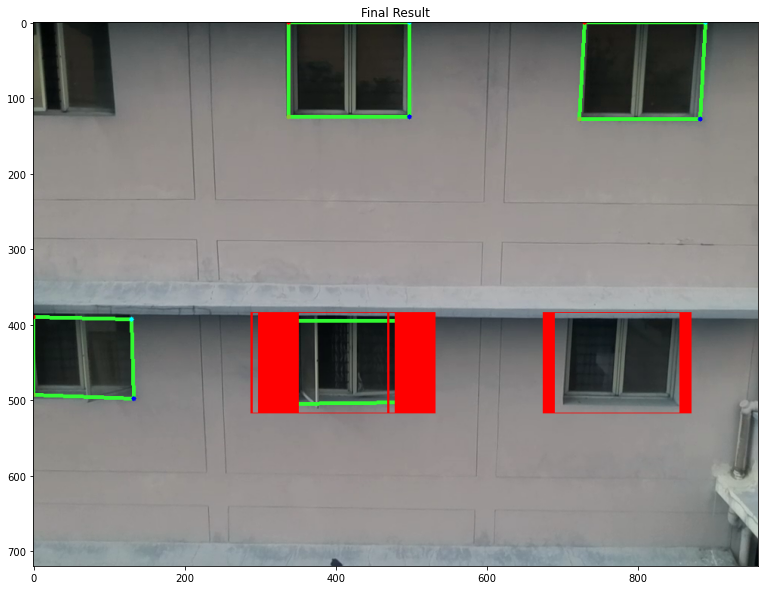

In [79]:
searchImgCoords = startX, endX, startY, endY

print("rects: " + str(rects))
print("\n")
mappedCoords = mapCoordsToOriginalFrame(rects, searchImgCoords)
print("mappedCoords: " + str(mappedCoords))

for pt in (mappedCoords): 
    print(str(pt[0]) + " "  + str(pt[1]))
    print(str(pt[2]) + " "  + str(pt[3]))
    cv2.rectangle(img_show, (pt[0],pt[1]),  (pt[2], pt[3]), (255,0,0), 1)   
# Now display the final matched template image   
plt.figure(figsize=(20,10))
plt.imshow(img_show)  
plt.title('Final Result')

In [30]:
mappedCoords[0][0]

321